# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Adel Parvizi
2.   Student Number: 400206602


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/HW1/data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset.sample(frac=0.8, random_state=48)['X']
y_train = dataset.sample(frac=0.8, random_state=48)['Y']

x_test = dataset.drop(x_train.index)["X"]
y_test = dataset.drop(x_train.index)["Y"]

In [4]:
x_train.shape

(400,)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [5]:
x_test

0      1.867470
1      1.168675
3      1.477912
6      0.911647
12     1.381526
         ...   
460    0.662651
466    1.879518
472    0.433735
492    0.895582
494    0.738956
Name: X, Length: 100, dtype: float64

In [6]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

A = np.ones((x_train.shape[0],2))
A[:, 0] = x_train
y = y_train.to_numpy()[:,np.newaxis]
m = np.matmul(np.linalg.inv(np.matmul(A.T,A)), np.matmul(A.T,y))
m

array([[-0.98793451],
       [ 0.78800492]])

In [7]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3365575263386516
MSE test error: 0.30841405221382223


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

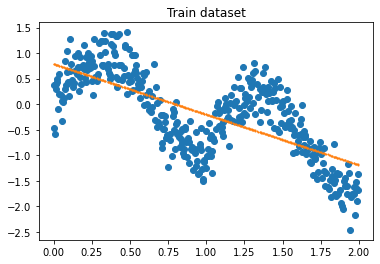

In [8]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

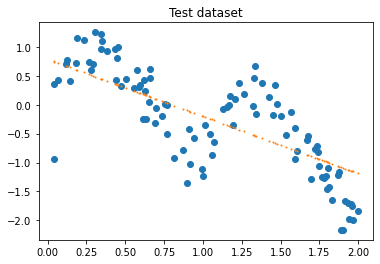

In [9]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

با توجه به رنجی که داده‌ها در آن قرار دارند خطای گزارش شده مطلوب نیست. همانطور که از شکل‌ها‌ی بالا دیده میشود، چه برای داده‌های تست و چه برای داد‌های ترین، داده‌هایی که رفتار غیر خطی دارند با یک تابع خطی تخمین زده میشوند که تنها دو پارامتر دارد. این خط چه در داده‌های ترین و چه در داده‌های تست داده‌ها را دنبال نمیکند. از اینرو خطای بلایی داردو این مدل خطی مناسب این داده‌ها نیست. مشکل اصلی این است که ما داده‌هایی داریم که رفتاری غیر خطی دارند و تخمین آنها به کمک یک مدل خطی خطای زیادی ایجاد میکند. بنابراین مدل مناسب مدلی است که بتواند این رفتار غیر‌خطی را مدل کند که مسلما به پارامتر‌های بیشتری هم نیاز دارد.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [10]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
      x1 = np.matrix(xi - the_query_point)
      x2 = -0.5*x1*x1.T
      # print('okkk:',xi, the_query_point, x1 , x2, x2/(hyperparameter**2))
      
      W[i, i] = np.exp(x2/(hyperparameter**2))
    # print(W[0:2, 0:2])
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [11]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = x_train.shape[0]
    X = np.hstack((train_X[:, np.newaxis], np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    # print("X[0]", enumerate(X))
    # print(qx)
    W = np.array(W)
    theta = np.matmul(np.linalg.inv(np.matmul(X.T, np.matmul(W ,X))), np.matmul(X.T,np.matmul(W, train_Y)))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [12]:
hyperparameter = 0.1
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = mean_squared_error(y_test, np.array(predicted_test).reshape([x_test.shape[0], ]))
print(f"MSE test error: {error}")

MSE test error: 0.09217459692925171


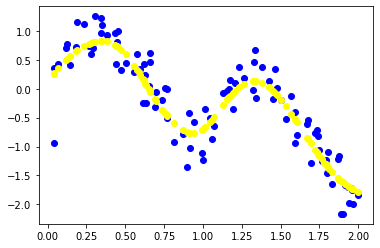

In [13]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, np.array(predicted_test).reshape([x_test.shape[0], ]), c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

مدل جدید یک مدل غیر خطی است. در واقع در هر مکانی با توجه به داده‌های اطرف آن مکان مدلی خطی آموزش می‌دهد که مجموعا یک مدل غیر خطی است. همانطور که از شکل بالا مشاهده میشود داده‌ها توسط مدل به خوبی دنبال میشود و دقت خوبی دارد. البته در این مدل نیز همانطور که از شکل دیده میشود در نقاط با انحای زیاد رفتار نامطلوبی مشاهده میشود که راه حل رفع آن تخمین مدل غیر‌خطی برای هر مکان است.برای مثال در هر مکان یک مدل درجه دو میتواند این مشکل ار حل کند. اما به طور کلی نتایج در این قسمت از قسمت قبل مطلوب‌تر می‌باشد.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here-

### Part10:
Implementing the `KNN model`.

In [14]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y
    def distance(self, x1, x2):
        distance = np.sqrt(np.sum((x2 - x1)**2)) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = []
        for i in self.X:
          d = self.distance(x, i)
          distances.append(d)
        ind = [i for y, i in sorted(zip(distances, list(range(400))))] # find indices of k nearest neighbours to x
        indices = ind[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(np.array(self.Y[neareest_indices]))
        return predicted_y

In [15]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [16]:
k = 10
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09352916351774457


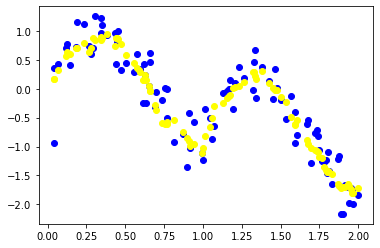

In [18]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

find best K

In [24]:
x_train.shape

(400,)

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
errors=[]
k = 8
for train_index, test_index in kf.split(y_train):
  error_knn, predicted_y = evaluation(k, x_train[train_index],  y_train[train_index], x_test, y_test)
  print(k, error_knn)
  errors.append(error_knn)
  k+=1

8 0.09139366489775186
9 0.09618294235687115
10 0.09528394661167132
11 0.0940071991856561
12 0.09317708853432316
13 0.10017097024957256
14 0.09201221155344781
15 0.09258160953761084
16 0.09916104946181686
17 0.09689746691043734


In [29]:
error_knn, predicted_y = evaluation(8, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09434522713364854


همانطور که از کراس ولیدیشن مشاهده شد 8 بهترین نتیجه را داد در این حالت روی داده های تست خطای تقریبا مساوی در حالت انتخاب عدد 10 به دست آمد.

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

با توجه خطا و نمودار رسم شده مشخص است که نسبت به دو مدل قبل این مدل نتیجه بهتری به دست آورده است. این مدل همانند مدل خطی محلی قبل در هر مکان تصمیم گیری می‌کند. به عبارت بهتر در هر مکان به همسایه‌ها نگاه میکند و بر اساس آنها برای نقطه مورد نظر تصمیمی میگیرد. مطمئنا در حالتی که دادها از هم با فاصله زیادی باشند دقت مطلوب نخواهد بود.